# Clinical Diagnosis Classification Project

**Thesis work by Giovanni Camminiti under supervision of Prof. Andrea Belli**  
*Università Cattolica del Sacro Cuore*

This notebook demonstrates advanced machine learning techniques for clinical diagnosis classification, including:
- Random Forest, CatBoost, and Neural Networks
- AutoFeat automated feature engineering
- Ensemble methods for robust predictions
- Comprehensive model validation and analysis

## Setup Instructions

**Run the cells below in order:**

1. **Package Installation** - Automatically installs missing packages
2. **Library Imports** - Imports all required libraries  
3. **Data Loading** - Choose between GitHub or Google Drive options

**Required Packages:**
- `catboost` - Gradient boosting classifier
- `tensorflow` - Neural network framework  
- `autofeat` - Automated feature engineering
- `openpyxl` - Excel file reading support

**Pre-installed packages** (usually available): pandas, numpy, scikit-learn, matplotlib

In [3]:
# Install required packages (run this cell first if packages are missing)
import sys

def install_package(package):
    """Install package if not already installed"""
    try:
        __import__(package)
        print(f"✅ {package} already installed")
    except ImportError:
        print(f"📦 Installing {package}...")
        import subprocess
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} installed successfully")

# Check and install required packages
packages = {
    'catboost': 'catboost',
    'tensorflow': 'tensorflow', 
    'autofeat': 'autofeat',
    'openpyxl': 'openpyxl'  # For Excel file reading
}

print("🔍 Checking required packages...")
for import_name, package_name in packages.items():
    install_package(package_name)

print("\n🎉 All packages ready!")
print("💡 Note: Standard packages (pandas, numpy, scikit-learn, matplotlib) are usually pre-installed")

🔍 Checking required packages...
📦 Installing catboost...
  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.8 MB/s eta 0:00:00
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.4 MB/s eta 0:00:0000:0100:01
Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
Using cached pandas-2.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 30.4 MB/s eta 0:00:0000:0100:

In [4]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    precision_score, recall_score, f1_score
)

# CatBoost
from catboost import CatBoostClassifier, Pool

# TensorFlow/Keras for Neural Networks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# AutoFeat for automated feature engineering
from autofeat import AutoFeatClassifier

print("📦 All libraries imported successfully!")
print("🔧 Environment ready for machine learning analysis")

2025-08-04 10:00:05.566452: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-04 10:00:05.567174: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-04 10:00:05.570234: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-04 10:00:05.577771: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754294405.590614   48031 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754294405.59

📦 All libraries imported successfully!
🔧 Environment ready for machine learning analysis


In [ ]:
# Option B: Load dataset directly from GitHub repository
import pandas as pd

# GitHub raw URLs for the dataset (trying both branches)
urls_to_try = [
    {
        'name': 'CSV from clean-main branch',
        'url': 'https://raw.githubusercontent.com/nluninja/class-ml/clean-main/data/dataset.csv',
        'type': 'csv'
    },
    {
        'name': 'CSV from main branch', 
        'url': 'https://raw.githubusercontent.com/nluninja/class-ml/main/data/dataset.csv',
        'type': 'csv'
    },
    {
        'name': 'Excel from clean-main branch',
        'url': 'https://raw.githubusercontent.com/nluninja/class-ml/clean-main/data/dataset.xlsx',
        'type': 'excel'
    },
    {
        'name': 'Excel from main branch',
        'url': 'https://raw.githubusercontent.com/nluninja/class-ml/main/data/dataset.xlsx', 
        'type': 'excel'
    }
]

print("📥 Loading dataset from GitHub repository...")

df = None
for attempt in urls_to_try:
    try:
        print(f"🔄 Trying: {attempt['name']}...")
        
        if attempt['type'] == 'csv':
            df = pd.read_csv(attempt['url'])
        else:  # excel
            df = pd.read_excel(attempt['url'], engine='openpyxl')
            
        print(f"✅ Successfully loaded from {attempt['name']}!")
        break
        
    except Exception as e:
        print(f"⚠️ Failed: {str(e)[:100]}...")
        continue

if df is None:
    print("❌ All loading attempts failed!")
    print("💡 Please use Option A (Google Drive) or download the dataset manually")
    print("\n📋 Manual alternatives:")
    print("• Use Google Colab with Drive mount (Option A)")
    print("• Download dataset.csv manually and upload to your environment")
    print("• Clone the repository locally: git clone https://github.com/nluninja/class-ml.git")
else:
    print(f"📊 Shape: {df.shape}")
    print(f"🏥 Patients: {df.shape[0]}, Features: {df.shape[1]-2}")  # -2 for patient_id and target
    
    # Display first few rows
    df.head()

## Data Loading Options

**Choose one of the following approaches:**

1. **Option A: Google Colab with Drive** - Run the cell below if you have the dataset stored in Google Drive
2. **Option B: GitHub Repository** - Run the cell after this if you want to load directly from the GitHub repository

**Note:** You only need to run ONE of these approaches depending on your setup.

In [ ]:
# Option B: Load dataset directly from GitHub repository
import pandas as pd

# GitHub raw URL for the dataset
dataset_url = "https://raw.githubusercontent.com/nluninja/class-ml/clean-main/data/dataset.xlsx"

print("📥 Loading dataset from GitHub repository...")
try:
    df = pd.read_excel(dataset_url)
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Shape: {df.shape}")
    print(f"🏥 Patients: {df.shape[0]}, Features: {df.shape[1]-2}")  # -2 for patient_id and target
    
    # Display first few rows
    display(df.head())
    
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    print("💡 Please check your internet connection or use Option A with Google Drive")

# Alternative: Load from local file if running locally
# df = pd.read_csv("data/dataset.csv")  # Uncomment if running locally

In [ ]:
# Option A: Load from Google Drive (if using Colab mount)
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Tesi/Dataset Tesi 2.xlsx")

print(f"✅ Dataset loaded from Google Drive!")
print(f"📊 Shape: {df.shape}")
print(f"🏥 Patients: {df.shape[0]}, Features: {df.shape[1]-2}")

df.head()

Controllo le condizioni

In [ ]:
# Elenco aggiornato delle condizioni con correzioni (indici numerici, A=1, B=2, ecc.)
condizioni = [
    {'colonne': (3, 30), 'colonna_condizione': 2, 'valore_condizione': 2},         # C:AD se B=2
    {'colonne': (34, 34), 'colonna_condizione': 33, 'valore_condizione': 5},       # AH se AG=5
    {'colonne': (57, 62), 'colonna_condizione': 56, 'valore_condizione': 1},       # BE:BJ se BD=1
    {'colonne': (64, 71), 'colonna_condizione': 63, 'valore_condizione': 1},       # BL:BS se BK=1
    {'colonne': (72, 76), 'colonna_condizione': 71, 'valore_condizione': 1},       # BT:BX se BS=1
    {'colonne': (77, 77), 'colonna_condizione': 63, 'valore_condizione': 1},       # BY se BK=1
    {'colonne': (78, 85), 'colonna_condizione': 77, 'valore_condizione': 1},       # BZ:CG se BY=1
    {'colonne': (86, 87), 'colonna_condizione': 63, 'valore_condizione': 1},       # CH:CI se BK=1
    {'colonne': (88, 88), 'colonna_condizione': 87, 'valore_condizione': 1},       # CJ se CI=1
    {'colonne': (89, 89), 'colonna_condizione': 63, 'valore_condizione': 1},       # CK se BK=1
    {'colonne': (90, 91), 'colonna_condizione': 89, 'valore_condizione': 1},       # CL:CM se CK=1
    {'colonne': (92, 92), 'colonna_condizione': 63, 'valore_condizione': 1},       # CN se BK=1
    {'colonne': (93, 105), 'colonna_condizione': 92, 'valore_condizione': 1},      # CO:CZ se CN=1
    {'colonne': (106, 106), 'colonna_condizione': 63, 'valore_condizione': 1},     # DB se BK=1
    {'colonne': (107, 137), 'colonna_condizione': 106, 'valore_condizione': 1},    # DC:EG se DB=1
    {'colonne': (139, 145), 'colonna_condizione': 138, 'valore_condizione': 1},    # EI:EO se EH=1
    {'colonne': (146, 146), 'colonna_condizione': 145, 'valore_condizione': 1},    # EP se EO=1
    {'colonne': (147, 151), 'colonna_condizione': 146, 'valore_condizione': 1},    # EQ:EU se EP=1
    {'colonne': (152, 152), 'colonna_condizione': 146, 'valore_condizione': 2},    # EV se EP=2
    {'colonne': (153, 159), 'colonna_condizione': 145, 'valore_condizione': 1},    # EW:FC se EO=1
    {'colonne': (159, 159), 'colonna_condizione': 153, 'valore_condizione': 2},    # FC se EW=2
    {'colonne': (160, 160), 'colonna_condizione': 138, 'valore_condizione': 1},    # FD se EH=1
    {'colonne': (161, 161), 'colonna_condizione': 160, 'valore_condizione': 1},    # FE se FD=1
    {'colonne': (162, 162), 'colonna_condizione': 161, 'valore_condizione': 3},    # FF se FE=3
    {'colonne': (163, 175), 'colonna_condizione': 161, 'valore_condizione': 2},    # FG:FS se FE=2
    {'colonne': (176, 176), 'colonna_condizione': 160, 'valore_condizione': 1},    # FT se FD=1
    {'colonne': (177, 177), 'colonna_condizione': 176, 'valore_condizione': 3},    # FU se FT=3
    {'colonne': (178, 181), 'colonna_condizione': 176, 'valore_condizione': 2},    # FV:GA se FT=2
    {'colonne': (184, 184), 'colonna_condizione': 182, 'valore_condizione': 1},    # GB se FZ=1
    {'colonne': (185, 191), 'colonna_condizione': 161, 'valore_condizione': 2},    # GC:GI se FE=2
    {'colonne': (192, 192), 'colonna_condizione': 190, 'valore_condizione': 1},    # GJ se GH=1
    {'colonne': (193, 193), 'colonna_condizione': 160, 'valore_condizione': 1},    # GK se FD=1
    {'colonne': (195, 221), 'colonna_condizione': 194, 'valore_condizione': 1},    # GM:HM se GL=1
    {'colonne': (222, 222), 'colonna_condizione': 221, 'valore_condizione': 1},    # HN se HM=1
    {'colonne': (223, 227), 'colonna_condizione': 208, 'valore_condizione': 1},    # HO:HS se GZ=1
    {'colonne': (245, 246), 'colonna_condizione': 237, 'valore_condizione': 1},    # IK:IL se IC=1
    {'colonne': (249, 249), 'colonna_condizione': (247, 248), 'valore_condizione': (3, 3)} # IO se IM=3 e IN=3
]


def verifica_condizioni(df, condizioni):
    for cond in condizioni:
        start, end = cond['colonne']
        col_cond = cond['colonna_condizione']
        val_cond = cond['valore_condizione']

        colonne_da_controllare = df.iloc[:, start-1:end]

        # Filtro booleano per righe valide
        if isinstance(col_cond, tuple):
            filtro = (df.iloc[:, col_cond[0]-1] == val_cond[0]) & (df.iloc[:, col_cond[1]-1] == val_cond[1])
        else:
            filtro = df.iloc[:, col_cond-1] == val_cond

        # Subset delle righe che NON rispettano la condizione
        righe_da_verificare = colonne_da_controllare[~filtro]

        # Verifica: conta celle che non sono né NaN né 0
        violazioni = ((righe_da_verificare.notna()) & (righe_da_verificare != 0)).sum().sum()

        if violazioni == 0:
            print(f"✅ Condizione colonne {start}:{end} con colonna {col_cond} = {val_cond} rispettata.")
        else:
            print(f"❌ Condizione colonne {start}:{end} con colonna {col_cond} = {val_cond} NON rispettata ({violazioni} violazioni).")


# Esegui il controllo aggiornato delle condizioni
verifica_condizioni(df, condizioni)

✅ Condizione colonne 3:30 con colonna 2 = 2 rispettata.
✅ Condizione colonne 34:34 con colonna 33 = 5 rispettata.
✅ Condizione colonne 57:62 con colonna 56 = 1 rispettata.
✅ Condizione colonne 64:71 con colonna 63 = 1 rispettata.
✅ Condizione colonne 72:76 con colonna 71 = 1 rispettata.
✅ Condizione colonne 77:77 con colonna 63 = 1 rispettata.
✅ Condizione colonne 78:85 con colonna 77 = 1 rispettata.
✅ Condizione colonne 86:87 con colonna 63 = 1 rispettata.
✅ Condizione colonne 88:88 con colonna 87 = 1 rispettata.
✅ Condizione colonne 89:89 con colonna 63 = 1 rispettata.
✅ Condizione colonne 90:91 con colonna 89 = 1 rispettata.
✅ Condizione colonne 92:92 con colonna 63 = 1 rispettata.
✅ Condizione colonne 93:105 con colonna 92 = 1 rispettata.
✅ Condizione colonne 106:106 con colonna 63 = 1 rispettata.
✅ Condizione colonne 107:137 con colonna 106 = 1 rispettata.
✅ Condizione colonne 139:145 con colonna 138 = 1 rispettata.
✅ Condizione colonne 146:146 con colonna 145 = 1 rispettata.
✅ Co

Distribuzione del target:
target
1    1953
2    2095
Name: count, dtype: int64

Percentuali:
target
1    48.25
2    51.75
Name: count, dtype: float64


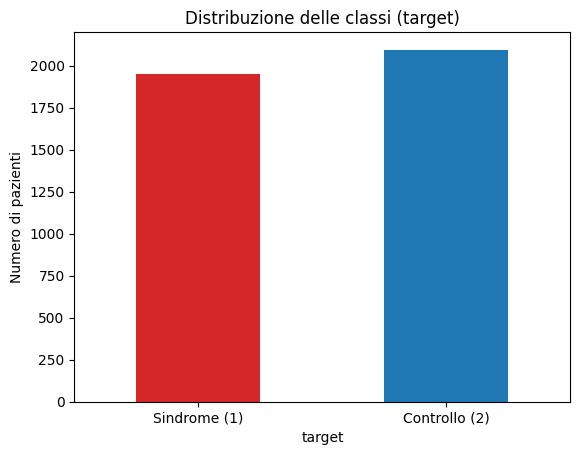

In [ ]:
# Conta i valori del target
conteggio_target = df["target"].value_counts().sort_index()

# Calcola le percentuali
percentuali_target = (conteggio_target / len(df) * 100).round(2)

# Stampa i risultati
print("Distribuzione del target:")
print(conteggio_target)
print("\nPercentuali:")
print(percentuali_target)

# Visualizza con un grafico
import matplotlib.pyplot as plt

labels = ['Sindrome (1)', 'Controllo (2)']
colors = ['tab:red', 'tab:blue']
conteggio_target.plot(kind='bar', color=colors)
plt.xticks(ticks=[0,1], labels=labels, rotation=0)
plt.title("Distribuzione delle classi (target)")
plt.ylabel("Numero di pazienti")
plt.show()

Controllo NaN

In [ ]:
# Conta i NaN (veri mancanti o non applicabili)
na_count = df.isna().sum()

# Calcola la % di NaN
na_percent = (na_count / len(df) * 100).round(2)

# Crea tabella riepilogativa
missing_summary = pd.DataFrame({
    'MissingCount': na_count,
    'MissingPercent': na_percent
})

# Mostra solo le colonne che hanno almeno 1 NaN
missing_summary = missing_summary[missing_summary.MissingCount > 0]

# Ordina per % decrescente
missing_summary.sort_values('MissingPercent', ascending=False).head(20)

,MissingCount,MissingPercent
specify_primary_skin_condi,4048,100.00
other_mri_edema,4023,99.38
muscle_dysphagia_met_oth,4017,99.23
other_areas_mri,4014,99.16
other_overlap_syndrome,4008,99.01
other_diagnosis,4002,98.86
specify_other_races,3988,98.52
other_findings_abn_hrct,3987,98.49
lung_symptom_other,3982,98.37
hrct_other_findings_diagnosis,3953,97.65


In [ ]:
# Soglia percentuale di NaN sopra la quale valutare l'eliminazione
soglia_percentuale = 70

# 1. Estrai colonne condizionate dalla tua lista 'condizioni'
colonne_condizionate = set()
for cond in condizioni:
    start, end = cond['colonne']
    colonne_condizionate.update(df.columns[start-1:end])

# 2. Definisci colonne core che non vanno toccate
colonne_core = {'patient_id', 'target', 'sex'}

# 3. Calcola NaN e percentuali
na_count = df.isna().sum()
na_percent = (na_count / len(df) * 100).round(2)

# 4. Classifica ogni colonna
report = pd.DataFrame({
    'MissingCount': na_count,
    'MissingPercent': na_percent,
    'Tipo': [
        'Condizionata' if col in colonne_condizionate else
        'Core' if col in colonne_core else
        'Possibile eliminazione' if na_percent[col] > soglia_percentuale else
        'OK'
        for col in df.columns
    ]
})

# 5. Estrai solo le colonne da valutare per eliminazione
colonne_da_controllare = report[report['Tipo'] == 'Possibile eliminazione'].index.tolist()

# 6. Conta i valori informativi (>0) solo se non NaN
valori_significativi = df[colonne_da_controllare].apply(lambda col: ((col != 0) & col.notna()).sum())

# 7. Completa il report
report_filtrato = report.loc[colonne_da_controllare].copy()
report_filtrato['ValoriSignificativi(>0)'] = valori_significativi
report_filtrato = report_filtrato.sort_values(by='ValoriSignificativi(>0)', ascending=True)

# 8. Mostra riepilogo e prime righe del report
print("Conteggio colonne per tipo:")
print(report['Tipo'].value_counts())

# Visualizza le prime colonne da valutare
report_filtrato.head(20)

Conteggio colonne per tipo:
Tipo
Condizionata              198
OK                         71
Core                        3
Possibile eliminazione      1
Name: count, dtype: int64


,MissingCount,MissingPercent,Tipo,ValoriSignificativi(>0)
specify_other_symptom,3454,85.33,Possibile eliminazione,594


In [ ]:
report_condizionate = []

for cond in condizioni:
    start, end = cond['colonne']
    col_cond = cond['colonna_condizione']
    val_cond = cond['valore_condizione']
    colnames = df.columns[start-1:end]

    if isinstance(col_cond, tuple):
        filtro = (df.iloc[:, col_cond[0]-1] == val_cond[0]) & (df.iloc[:, col_cond[1]-1] == val_cond[1])
    else:
        filtro = df.iloc[:, col_cond-1] == val_cond

    for col in colnames:
        totali_validi = filtro.sum()
        valori_significativi = df.loc[filtro, col].apply(lambda x: pd.notna(x) and x != 0).sum()

        report_condizionate.append({
            'Colonna': col,
            'Condizione su col': df.columns[col_cond[0]-1] if isinstance(col_cond, tuple) else df.columns[col_cond-1],
            'Valore condizione': val_cond,
            'N_righe_condizione_valida': totali_validi,
            'N_valori_significativi': valori_significativi
        })

df_report_condizionate = pd.DataFrame(report_condizionate)
df_report_condizionate.sort_values('N_valori_significativi', ascending=True, inplace=True)

In [ ]:
# Filtra le colonne condizionate con 0 valori informativi anche quando la condizione è rispettata
colonne_da_eliminare = df_report_condizionate[
    (df_report_condizionate['N_righe_condizione_valida'] > 0) &
    (df_report_condizionate['N_valori_significativi'] == 0)
]['Colonna'].tolist()

# Mostra l'elenco
print("Colonne condizionate da eliminare (nessun valore >0):")
for col in colonne_da_eliminare:
    print(col)

Colonne condizionate da eliminare (nessun valore >0):
primary_skin_disease___3
specify_primary_skin_condi
primary_skin_disease___2


In [ ]:
colonne_da_eliminare = [
    "primary_skin_disease___2",
    "primary_skin_disease___3",
    "specify_primary_skin_condi"
]

df.drop(columns=colonne_da_eliminare, inplace=True)
print("Colonne eliminate correttamente.")

Colonne eliminate correttamente.


In [ ]:
# Backup del DataFrame prima dell’encoding
df_backup = df.copy()

Predizione

In [ ]:
X = df.drop(columns=['target', 'patient_id'])  # Escludi target e ID
y = df['target'].apply(lambda x: 1 if x == 1 else 0)  # Binario: 1 = sindrome, 0 = controllo

In [ ]:
X.head()
y.value_counts()

,count
target,
0,2095
1,1953


Non modifico il dataset, ma creo solo una variabile risposta

qua sotto non runnare prova di encode##############

In [ ]:
# Escludi colonne non predittive
# X = df.drop(columns=['target', 'patient_id'])

# Inizializza le liste
# colonne_binarie = []
# colonne_categoriche = []
# colonne_continue = []

# Classifica ogni colonna
# for col in X.columns:
#     valori_unici = X[col].dropna().unique()
#     n_valori = len(valori_unici)

#     if X[col].dtype == 'object':
#         colonne_categoriche.append(col)
#     elif n_valori == 2:
#         colonne_binarie.append(col)
#     elif n_valori <= 10:
#         colonne_categoriche.append(col)  # Valori numerici ma con categorie (es. 0–1–2)
#     else:
#         colonne_continue.append(col)

# Stampa i risultati
# print(f"Binarie: {len(colonne_binarie)} → {colonne_binarie[:5]}")
# print(f"Categoriche: {len(colonne_categoriche)} → {colonne_categoriche[:5]}")
# print(f"Continue: {len(colonne_continue)} → {colonne_continue[:5]}")

In [ ]:
# Trova le colonne categoriche che NON richiedono encoding (cioè già in formato numerico semplice)
# colonne_categoriche_scartate = []
#
# for col in colonne_categoriche:
#     valori_unici = sorted(X[col].dropna().unique())
#     if X[col].dtype != 'object' and set(valori_unici).issubset({0, 1, 2}):
#         colonne_categoriche_scartate.append(col)
#
# # Mostra l'elenco
# print(f"Colonne categoriche già pronte (non encodate): {len(colonne_categoriche_scartate)}")
# print(colonne_categoriche_scartate[:10])  # Mostra solo le prime 10 per brevità

In [ ]:
# import numpy as np
#
# # Ciclo su tutte le colonne del DataFrame
# for col in df.columns:
#     unici = df[col].dropna().unique()
#
#     # Ordina e formatta i valori
#     valori_format = []
#     for val in unici:
#         if isinstance(val, str):
#             valori_format.append(repr(val))
#         elif isinstance(val, (int, float, np.integer, np.floating)):
#             valori_format.append(f"np.float64({val})")
#         else:
#             valori_format.append(str(val))
#
#     # Mostra la riga
#     if len(valori_format) > 100:
#         print(f"{col} → [troppe modalità: {len(valori_format)} valori unici]")
#     else:
#         print(f"{col} → [{', '.join(valori_format)}]")

Label Encoding

In [ ]:
# from sklearn.preprocessing import LabelEncoder
#
# # Colonne da codificare
# columns_to_encode = [
#     'clinical_diagnosis___1', 'clinical_diagnosis___2', 'clinical_diagnosis___6', 'clinical_diagnosis___7',
#     'clinical_diagnosis___8', 'clinical_diagnosis___9', 'clinical_diagnosis___10', 'clinical_diagnosis___11',
#     'clinical_diagnosis___12', 'clinical_diagnosis___13', 'clinical_diagnosis___14', 'clinical_diagnosis___15',
#     'clinical_diagnosis___16', 'clinical_diagnosis___17', 'clinical_diagnosis___18', 'clinical_diagnosis___19',
#     'clinical_diagnosis___23', 'clinical_diagnosis___24', 'clinical_diagnosis___25', 'clinical_diagnosis___26',
#     'clinical_diagnosis___27', 'clinical_diagnosis___28', 'primary_skin_disease___1', 'sex', 'ethnicity', 'race',
#     'symptoms___1', 'symptoms___2', 'symptoms___3', 'symptoms___4', 'symptoms___5', 'symptoms___6', 'symptoms___7',
#     'symptoms___8', 'symptoms___9', 'symptoms___10', 'symptoms___11', 'symptoms___12', 'symptoms___13',
#     'symptoms___14', 'symptoms___15', 'symptoms___16', 'symptoms___17', 'symptoms___18', 'symptoms___19',
#     'inflammatory_arthropathy', 'joint_involvement_type', 'symmetric_polyarthritis', 'joint_deformity',
#     'ra_diagnosis', 'joint_x_ray', 'joint_erosions', 'muscle', 'weakness_upper_extremity', 'weakness_lower_extremity',
#     'weakness_neck', 'muscle_onset_type', 'severity_muscle_wekness', 'muscle_myalgia', 'muscle_tenderness',
#     'muscle_respiratory', 'muscle_resp_method___1', 'muscle_resp_method___2', 'muscle_resp_method___3',
#     'muscle_resp_method___4', 'muscle_resp_method___5', 'muscle_dysphagia', 'muscle_dysphagia_type',
#     'muscle_dysphagia_method___1', 'muscle_dysphagia_method___2', 'muscle_dysphagia_method___3',
#     'muscle_dysphagia_method___4', 'muscle_dysphagia_method___5', 'muscle_dysphagia_method___6',
#     'patient_dysphonia', 'muscle_enzyme', 'muscle_emg', 'ecg_other_myopathies', 'emg_activity', 'musce_mri',
#     'mri_myopathies', 'mri_findings___1', 'mri_findings___2', 'mri_findings___3', 'mri_findings___4',
#     'mri_findings___5', 'mri_areas_involved___2', 'mri_areas_involved___3', 'mri_areas_involved___4',
#     'mri_areas_involved___5', 'mri_areas_involved___6', 'muscle_biopsy', 'n_muscle_biopsies', 'muscle_biopsied',
#     'perimysial_infiltrate', 'endomysial_infiltrate', 'endomysial_infiltrate_sur', 'endomysial_infiltrate_no_necrotic',
#     'predominant_mononuclear', 'predominant_t_cd4', 'predominant_t_cd8', 'predominant_b',
#     'muscle_fiber_atrophy_diffu', 'perifascicular_atrophy', 'perimysial_connective_tiss',
#     'perifascicular_necrosis_de', 'scattered_endomysial_degen', 'mhc_1_perifascul', 'mhc_1_muscle_fibers',
#     'mhc_1_most_muscle_fibers', 'mhc_2_perifascicular_fib', 'mhc_2_muscle_fibers', 'mhc_2_most_muscle_fibers',
#     'mac_membrane_complex', 'mac_membrane_complex_no_necrotic', 'decreased_density_of_endom',
#     'tubuloreticular_inclusions', 'necrotic_muscle_fibers_as', 'ragged_red_fibers', 'cytochrome_oxidase_negativ',
#     'scattered_cd68_macrophages', 'rimmed_vacuoles_in_non_nec', 'lung_involvement', 'nature_lung_involvment',
#     'lung_symptom___1', 'lung_symptom___2', 'lung_symptom___3', 'lung_symptom___4', 'pft', 'first_pft_param_available',
#     'first_pft_pattern', 'abnormal_pft_param_available', 'abnormal_pft_pattern', 'hrct', 'findings_first_hrct',
#     'first_hrct_chest___1', 'first_hrct_chest___2', 'first_hrct_chest___3', 'first_hrct_chest___4',
#     'first_hrct_chest___5', 'first_hrct_chest___6', 'first_hrct_patterns___1', 'first_hrct_patterns___2',
#     'first_hrct_patterns___3', 'first_hrct_patterns___4', 'first_hrct_patterns___5', 'first_hrct_patterns___6',
#     'first_hrct_patterns___7', 'findings_abnormal_hrct', 'abnormal_hrct_findings___1', 'abnormal_hrct_findings___2',
#     'abnormal_hrct_findings___3', 'abnormal_hrct_findings___4', 'abnormal_hrct_findings___5',
#     'abnormal_hrct_findings___6', 'hrct_chest_findings___1', 'hrct_chest_findings___2', 'hrct_chest_findings___3',
#     'hrct_chest_findings___4', 'hrct_chest_findings___5', 'hrct_chest_findings___6', 'hrct_chest_findings___7',
#     'skin_manifestations_1', 'mechanic_s_hands', 'hiker_s_feet', 'gottron_papules', 'heliotrope_rash', 'v_sign',
#     'shawl_sign', 'malar_rash', 'calcinosis_skin', 'scalp_rash', 'palmar_papules_skin', 'upper_thigh_rash_holster_s',
#     'upper_arm_rash_sleeve_sign', 'peri_ungual_erythema', 'nailfold_capillaroscopy_al', 'puffy_hands',
#     'skin_thickening_cutaneous', 'fingertip_digital_pits_or', 'other_types_of_cutaneous_u', 'psoriasis',
#     'erythroderma', 'discoid_lupus', 'panniculitis', 'purpura_or_petechiae', 'pyoderma_gangrenosum', 'alopecia',
#     'any_other_rashes_skin_abno', 'raynaud', 'raynaud_type', 'capillaroscopy_lesion___1', 'capillaroscopy_lesion___2',
#     'capillaroscopy_lesion___3', 'capillaroscopy_lesion___4', 'capillaroscopy_lesion___9', 'ctd_sympt_signs',
#     'ctd_dry_eyes', 'ctd_dry_mouth', 'ctd_fever', 'ctd_weight_loss', 'ctd_schirmer', 'ctd_salivary_flow',
#     'ctd_salivary_bps', 'ctd_sjogren', 'ana_1', 'rf_1', 'anti_ccp_1', 'dsdna_1', 'sm_1', 'rnp_1', 'anca_mpo_1',
#     'anca_pr3_1', 'ana_pattern', 'cytoplasmic_pattern_ana', 'anti_ro52_ssa', 'anti_ro60_ssa', 'anti_ssa',
#     'anti_la_ssb1', 'anti_ribonucleoprotein_rnp', 'anti_mi_2', 'anti_srp', 'anti_ku', 'anti_jo_1', 'anti_pl7',
#     'anti_pl12', 'anti_oj', 'anti_ej', 'anti_ks', 'anti_zo', 'anti_yrs_thy_ha', 'anti_pm_scl', 'anti_mda_5',
#     'anti_nxp2_or_mj', 'anti_tif1_gamma', 'anti_hmgcr', 'anti_sae', 'anti_centromere_antibody_a',
#     'anti_topoisomerase_1_anti', 'anti_rna_polymerase_iii_rn', 'anti_th_to', 'method_test_myositis_2'
# ]
#
# # Applica Label Encoding solo a quelle colonne
# le = LabelEncoder()
# for col in columns_to_encode:
#     df[col] = le.fit_transform(df[col].astype(str))
#
# print("✅ Label Encoding eseguito correttamente")

In [ ]:
# df = pd.read_excel("/content/drive/MyDrive/Tesi/Dataset Tesi 2.xlsx")
# df_before = df.copy()

In [ ]:
#print("Before types\n", df_before[columns_to_encode].dtypes)
#print("After types\n",  df[columns_to_encode].dtypes)

In [ ]:
#for col in columns_to_encode[:5]:   # ne mostriamo 5 a titolo di esempio
#    print(col, "before:", sorted(df_before[col].unique()),
#              "after:", sorted(df[col].unique()))

In [ ]:
#for col in columns_to_encode:
#    assert df_before[col].nunique() == df[col].nunique()
#print("✅ Numero di categorie per colonna invariato.")

Train/Test

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Solo per le colonne con dtype == object (testuali)
colonne_testuali = df.select_dtypes(include='object').columns

# Applichi l'encoder mantenendo i NaN
df[colonne_testuali] = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1).fit_transform(df[colonne_testuali])

In [ ]:
from sklearn.model_selection import train_test_split

# Separazione X e y
X = df.drop(columns=['target', 'patient_id'])
y = df['target']

# Suddivisione
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify bilancia i target
)

In [ ]:
import pandas as pd

# Funzione per mostrare percentuali
def mostra_percentuali(y, nome):
    percentuali = y.value_counts(normalize=True) * 100
    print(f"\nDistribuzione percentuale in {nome}:")
    print(percentuali.round(2).astype(str) + " %")

# Distribuzione nel training set
mostra_percentuali(y_train, "train")

# Distribuzione nel test set
mostra_percentuali(y_test, "test")


Distribuzione percentuale in train:
target
2    51.76 %
1    48.24 %
Name: proportion, dtype: object

Distribuzione percentuale in test:
target
2    51.73 %
1    48.27 %
Name: proportion, dtype: object


Random Forest senza convertire i NaN o fare Label Encoder

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

[[370  21]
 [ 14 405]]
              precision    recall  f1-score   support

           1      0.964     0.946     0.955       391
           2      0.951     0.967     0.959       419

    accuracy                          0.957       810
   macro avg      0.957     0.956     0.957       810
weighted avg      0.957     0.957     0.957       810



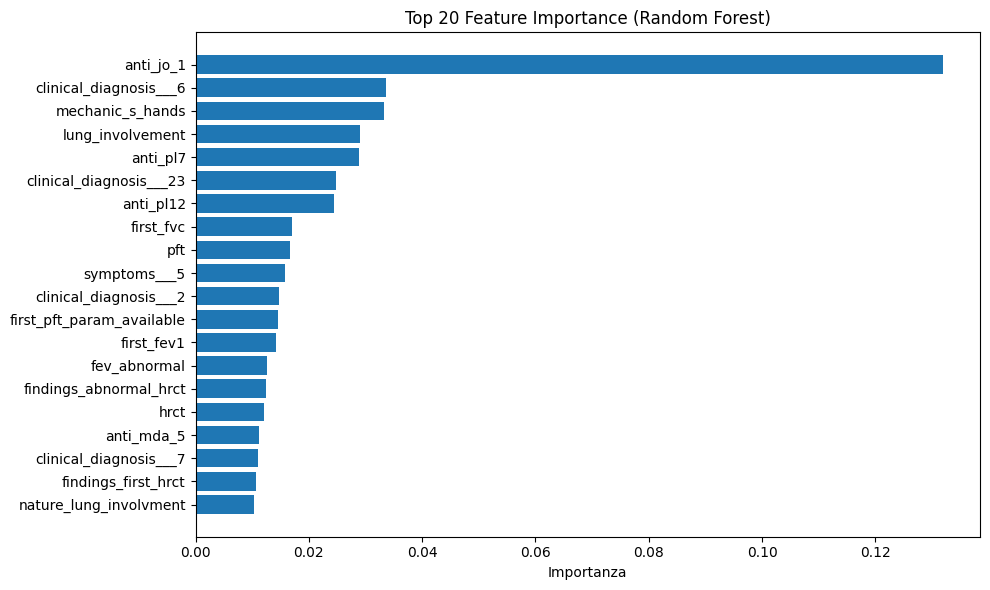

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ordina le feature per importanza
importances = model.feature_importances_
indices = np.argsort(importances)[-20:][::-1]  # Top 20
feature_names = X.columns[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances[indices])
plt.xlabel("Importanza")
plt.title("Top 20 Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Fare CV...

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Dati
X = df.drop(columns=['target', 'patient_id'])
y = df['target']

# Cross-validation stratificata
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modello
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Esegui CV con più metriche
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(model, X, y, cv=cv, scoring=scoring)

# Report
for metric in scoring:
    valori = scores[f'test_{metric}']
    print(f"{metric}: {np.round(valori, 3)}")
    print(f"{metric} medio: {np.mean(valori):.3f}")


accuracy: [0.962 0.964 0.953 0.953 0.949]
accuracy medio: 0.956
precision_macro: [0.962 0.964 0.953 0.953 0.949]
precision_macro medio: 0.956
recall_macro: [0.962 0.964 0.953 0.953 0.949]
recall_macro medio: 0.956
f1_macro: [0.962 0.964 0.953 0.953 0.949]
f1_macro medio: 0.956


In [ ]:
# CatBoost installation moved to setup section at the beginning
# If you skipped the setup section, uncomment the line below:
# !pip install catboost

print("🔧 CatBoost should be installed from the setup section")

**CatBoost**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Dati
X = df.drop(columns=['target', 'patient_id'])
y = df['target']

# Inizializza modello
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    verbose=0,
    random_seed=42
)

# CV stratificata
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Liste risultati
acc, prec, rec, f1s = [], [], [], []

# CV loop
for train_idx, test_idx in cv.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

    # Dataset Pool per CatBoost
    train_pool = Pool(X_train, y_train)
    val_pool = Pool(X_val, y_val)

    # Fit
    model.fit(train_pool)

    # Predict
    y_pred = model.predict(val_pool)

    # Metriche
    acc.append(accuracy_score(y_val, y_pred))
    prec.append(precision_score(y_val, y_pred, average='macro'))
    rec.append(recall_score(y_val, y_pred, average='macro'))
    f1s.append(f1_score(y_val, y_pred, average='macro'))

# Risultati
print("Accuracy:", np.round(acc, 3), "→ media:", round(np.mean(acc), 3))
print("Precision_macro:", np.round(prec, 3), "→ media:", round(np.mean(prec), 3))
print("Recall_macro:", np.round(rec, 3), "→ media:", round(np.mean(rec), 3))
print("F1_macro:", np.round(f1s, 3), "→ media:", round(np.mean(f1s), 3))

Accuracy: [1.    0.996 0.994 0.995 0.994] → media: 0.996
Precision_macro: [1.    0.996 0.994 0.995 0.994] → media: 0.996
Recall_macro: [1.    0.996 0.994 0.995 0.994] → media: 0.996
F1_macro: [1.    0.996 0.994 0.995 0.994] → media: 0.996


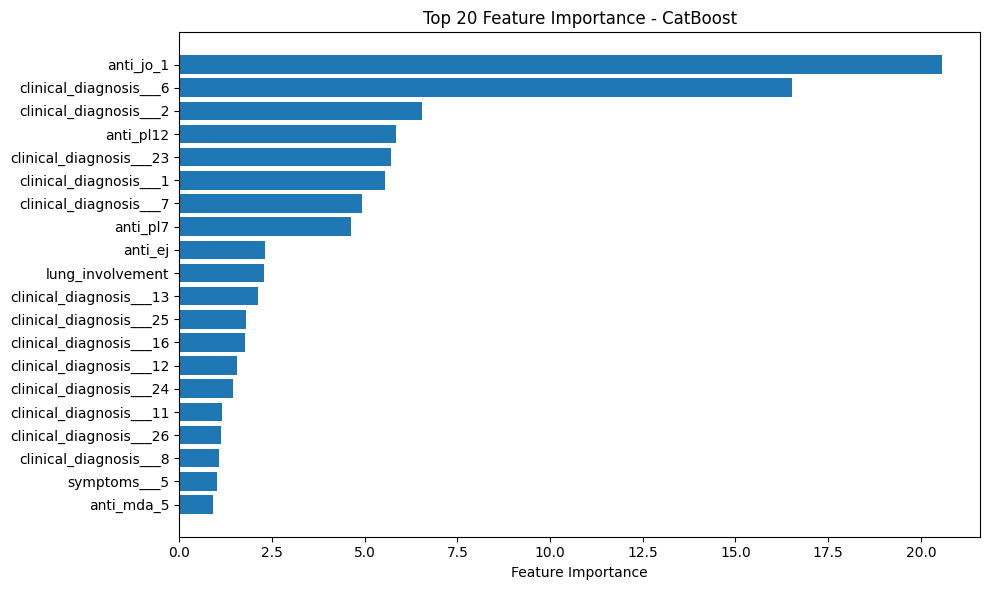

In [ ]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reinizializza i dati (se necessario)
X = df.drop(columns=['target', 'patient_id'])
y = df['target']

# Inizializza e allena CatBoost su tutto il dataset (per importanza feature)
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)

model.fit(X, y)

# Ottieni importanza delle feature
importances = model.get_feature_importance()
feature_names = X.columns

# Crea DataFrame ordinato
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)

# Visualizza
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importance - CatBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Separazione X e y
X = df.drop(columns=['target', 'patient_id'])
y = df['target']

# Suddivisione train/test stratificata
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Inizializza e allena il modello
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)

model.fit(X_train, y_train)

# Predizioni sul test set
y_pred = model.predict(X_test)

# Valutazione
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

# Metriche singole
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nAccuracy: {acc:.3f}")
print(f"Precision (macro): {prec:.3f}")
print(f"Recall (macro): {rec:.3f}")
print(f"F1-score (macro): {f1:.3f}")

Confusion Matrix:
[[386   5]
 [  2 417]]

Classification Report:
              precision    recall  f1-score   support

           1      0.995     0.987     0.991       391
           2      0.988     0.995     0.992       419

    accuracy                          0.991       810
   macro avg      0.991     0.991     0.991       810
weighted avg      0.991     0.991     0.991       810


Accuracy: 0.991
Precision (macro): 0.991
Recall (macro): 0.991
F1-score (macro): 0.991


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Dati
X = df.drop(columns=['target', 'patient_id'])
y = df['target']

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inizializza metriche
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Modello CatBoost
model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

# Loop sui fold
for train_idx, val_idx in cv.split(X, y):
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_val_cv)

    accuracy_scores.append(accuracy_score(y_val_cv, y_pred_cv))
    precision_scores.append(precision_score(y_val_cv, y_pred_cv, average='macro'))
    recall_scores.append(recall_score(y_val_cv, y_pred_cv, average='macro'))
    f1_scores.append(f1_score(y_val_cv, y_pred_cv, average='macro'))

# Stampa i risultati
print("Accuracy:", np.round(accuracy_scores, 3), "→ media:", round(np.mean(accuracy_scores), 3))
print("Precision_macro:", np.round(precision_scores, 3), "→ media:", round(np.mean(precision_scores), 3))
print("Recall_macro:", np.round(recall_scores, 3), "→ media:", round(np.mean(recall_scores), 3))
print("F1_macro:", np.round(f1_scores, 3), "→ media:", round(np.mean(f1_scores), 3))

Accuracy: [0.999 0.996 0.995 0.996 0.993] → media: 0.996
Precision_macro: [0.999 0.996 0.995 0.996 0.992] → media: 0.996
Recall_macro: [0.999 0.996 0.995 0.996 0.993] → media: 0.996
F1_macro: [0.999 0.996 0.995 0.996 0.993] → media: 0.996


Feed Forward

In [ ]:
#import pandas as pd
#import numpy as np
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, classification_report
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Input
#from tensorflow.keras.optimizers import Adam
#import matplotlib.pyplot as plt

# Carica i dati (se non li hai già caricati)
# df = pd.read_excel('percorso_al_tuo_file.xlsx')

# Sostituisci -1 con NaN
#X = df.drop(columns=['target', 'patient_id']).replace(-1, np.nan)
#y = df['target'].apply(lambda x: 1 if x == 1 else 0)  # binarizzazione

# Imputazione NaN con la media
#imputer = SimpleImputer(strategy='mean')
#X_imputed = imputer.fit_transform(X)

# Standardizzazione
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_imputed)

# Train/test split
#X_train, X_test, y_train, y_test = train_test_split(
#    X_scaled, y, test_size=0.2, random_state=42, stratify=y
#)

# Costruzione modello FFNN
#model = Sequential([
#    Input(shape=(X_train.shape[1],)),
#    Dense(128, activation='relu'),
#    Dropout(0.3),
#    Dense(64, activation='relu'),
#    Dropout(0.3),
#    Dense(1, activation='sigmoid')
#])

#model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Addestra il modello
#history = model.fit(
#    X_train, y_train,
#    validation_data=(X_test, y_test),
#    epochs=100,
#    batch_size=32,
#    verbose=1
#)

# Valutazione
#y_pred = (model.predict(X_test) > 0.5).astype(int)

#print("\nConfusion Matrix:")
#print(confusion_matrix(y_test, y_pred))

#print("\nClassification Report:")
#print(classification_report(y_test, y_pred, digits=3))

# Plot delle metriche
#plt.figure(figsize=(12, 5))
#plt.subplot(1, 2, 1)
#plt.plot(history.history['loss'], label='Loss (train)')
#plt.plot(history.history['val_loss'], label='Loss (val)')
#plt.title('Loss')
#plt.legend()

#plt.subplot(1, 2, 2)
#plt.plot(history.history['accuracy'], label='Accuracy (train)')
#plt.plot(history.history['val_accuracy'], label='Accuracy (val)')
#plt.title('Accuracy')
#plt.legend()
#plt.tight_layout()
#plt.show()

FFNN con BatchNormalization

In [ ]:
#import pandas as pd
#import numpy as np
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, classification_report
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
#from tensorflow.keras.optimizers import Adam
#import matplotlib.pyplot as plt

# Preprocessing
#X = df.drop(columns=['target', 'patient_id']).replace(-1, np.nan)
#y = df['target'].apply(lambda x: 1 if x == 1 else 0)

# Imputazione dei NaN con media
#imputer = SimpleImputer(strategy='mean')
#X_imputed = imputer.fit_transform(X)

# Standardizzazione
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_imputed)

# Train/test split
#X_train, X_test, y_train, y_test = train_test_split(
#    X_scaled, y, test_size=0.2, random_state=42, stratify=y
#)

# Costruzione modello con BatchNormalization
#model = Sequential([
#    Input(shape=(X_train.shape[1],)),
#    Dense(128, activation='relu'),
#    BatchNormalization(),
#    Dropout(0.3),
#    Dense(64, activation='relu'),
#    BatchNormalization(),
#    Dropout(0.3),
#    Dense(1, activation='sigmoid')
#])

# Compilazione
#model.compile(
#    optimizer=Adam(learning_rate=0.001),
#    loss='binary_crossentropy',
#    metrics=['accuracy']
#)

# Addestramento
#history = model.fit(
#    X_train, y_train,
#    validation_data=(X_test, y_test),
#    epochs=100,
#    batch_size=32,
#    verbose=1
#)

# Predizione e valutazione
#y_pred = (model.predict(X_test) > 0.5).astype(int)

#print("\nConfusion Matrix:")
#print(confusion_matrix(y_test, y_pred))

#print("\nClassification Report:")
#print(classification_report(y_test, y_pred, digits=3))

# Plot Loss e Accuracy
#plt.figure(figsize=(12, 5))

#plt.subplot(1, 2, 1)
#plt.plot(history.history['loss'], label='Loss (train)')
#plt.plot(history.history['val_loss'], label='Loss (val)')
#plt.title('Loss')
#plt.legend()

#plt.subplot(1, 2, 2)
#plt.plot(history.history['accuracy'], label='Accuracy (train)')
#plt.plot(history.history['val_accuracy'], label='Accuracy (val)')
#plt.title('Accuracy')
#plt.legend()

#plt.tight_layout()
#plt.show()

Per evitare overfitting

In [ ]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import EarlyStopping

# Preprocessing
#X = df.drop(columns=['target', 'patient_id']).replace(-1, np.nan)
#y = df['target'].apply(lambda x: 1 if x == 1 else 0)

#imputer = SimpleImputer(strategy='mean')
#X_imputed = imputer.fit_transform(X)

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_imputed)

# Cross-validation
#kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Salvataggio metriche
#all_histories = []
#acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []

#fold = 1
#for train_idx, val_idx in kf.split(X_scaled, y):
#    print(f"\n🔁 Fold {fold}")

#    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
#    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Costruzione modello
#    model = Sequential([
#        Input(shape=(X_train.shape[1],)),
#        Dense(128, activation='relu'),
#        BatchNormalization(),
#        Dropout(0.3),
#        Dense(64, activation='relu'),
#        BatchNormalization(),
#        Dropout(0.3),
#        Dense(1, activation='sigmoid')
#    ])

#    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

#    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#    history = model.fit(
#        X_train, y_train,
#        validation_data=(X_val, y_val),
#        epochs=100,
#        batch_size=32,
#        verbose=0,
#        callbacks=[early_stop]
#    )

#    all_histories.append(history)

    # Valutazione
#    y_pred = (model.predict(X_val) > 0.5).astype(int)

#    print("Confusion Matrix:")
#    print(confusion_matrix(y_val, y_pred))

#    acc = accuracy_score(y_val, y_pred)
#    prec = precision_score(y_val, y_pred)
#    rec = recall_score(y_val, y_pred)
#    f1 = f1_score(y_val, y_pred)

#    acc_scores.append(acc)
#    prec_scores.append(prec)
#    rec_scores.append(rec)
#    f1_scores.append(f1)

#    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1-score: {f1:.3f}")
#    fold += 1

# Media dei risultati
#print("\n📊 Risultati medi su 5 fold:")
#print(f"Accuracy: {np.mean(acc_scores):.3f}")
#print(f"Precision: {np.mean(prec_scores):.3f}")
#print(f"Recall: {np.mean(rec_scores):.3f}")
#print(f"F1-score: {np.mean(f1_scores):.3f}")

# Plot medio Loss e Accuracy
#plt.figure(figsize=(12, 5))

# Loss
#plt.subplot(1, 2, 1)
#for h in all_histories:
#    plt.plot(h.history['loss'], color='blue', alpha=0.2)
#    plt.plot(h.history['val_loss'], color='orange', alpha=0.2)
#plt.title('Loss per Fold')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend(['Train Loss', 'Val Loss'])

# Accuracy
#plt.subplot(1, 2, 2)
#for h in all_histories:
#    plt.plot(h.history['accuracy'], color='blue', alpha=0.2)
#    plt.plot(h.history['val_accuracy'], color='orange', alpha=0.2)
#plt.title('Accuracy per Fold')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend(['Train Accuracy', 'Val Accuracy'])

#plt.tight_layout()
#plt.show()

FFNN con StratifiedKFold, EsrlyStopping, BatchNormalization e Dropout


🔁 Fold 1
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Confusion Matrix:
[[419   0]
 [  0 391]]

Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       419
           1      1.000     1.000     1.000       391

    accuracy                          1.000       810
   macro avg      1.000     1.000     1.000       810
weighted avg      1.000     1.000     1.000       810

Fold 1 → Acc: 1.000, Prec: 1.000, Rec: 1.000, F1: 1.000

🔁 Fold 2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Confusion Matrix:
[[414   5]
 [  2 389]]

Classification Report:
              precision    recall  f1-score   support

           0      0.995     0.988     0.992       419
           1      0.987     0.995     0.991       391

    accuracy                          0.991       810
   macro avg      0.991     0.991     0.991       810
weighted avg      0.991     0.991     0.991       810

Fold 2 → Acc: 0.991, Prec: 0.991, Rec: 0.991, F1: 0.991

🔁 F

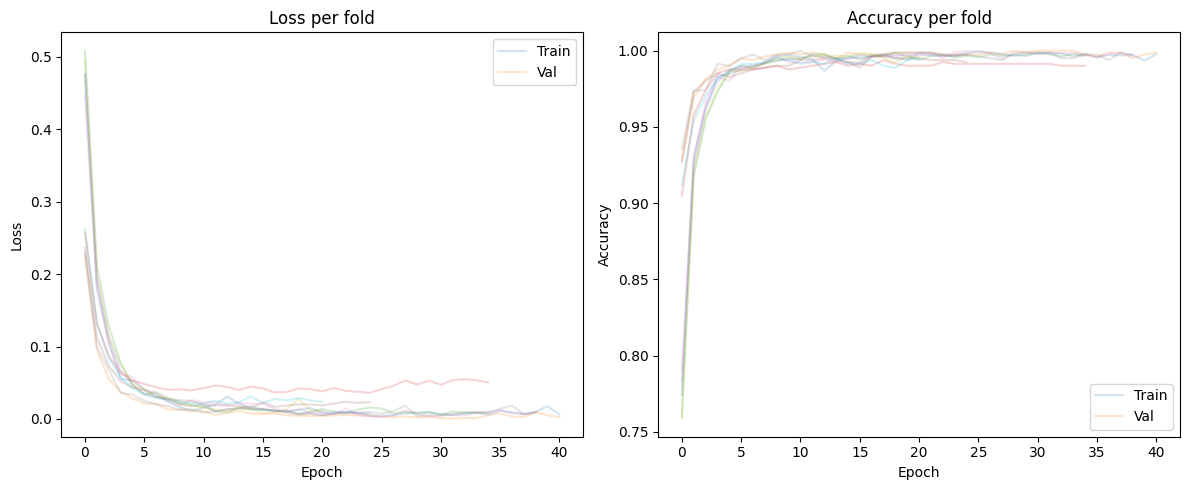

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# ————— Preprocessing —————
# Assumo che df sia già caricato e contenga 'target' e 'patient_id'
X = df.drop(columns=['target', 'patient_id']).replace(-1, np.nan)
y = df['target'].apply(lambda x: 1 if x == 1 else 0)

# Imputazione e standardizzazione
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# ————— Cross-Validation con EarlyStopping, BatchNorm e Confusion Matrix —————
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []
histories = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled, y), start=1):
    print(f"\n🔁 Fold {fold}")
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Definizione del modello
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # EarlyStopping sui validation loss
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Addestramento
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )
    histories.append(history)

    # Predizione e valutazione
    y_pred = (model.predict(X_val) > 0.5).astype(int)

    # Matrice di confusione e report
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred, digits=3))

    # Metriche numeriche
    acc_scores.append(accuracy_score(y_val, y_pred))
    prec_scores.append(precision_score(y_val, y_pred, average='macro'))
    rec_scores.append(recall_score(y_val, y_pred, average='macro'))
    f1_scores.append(f1_score(y_val, y_pred, average='macro'))

    print(f"Fold {fold} → Acc: {acc_scores[-1]:.3f}, "
          f"Prec: {prec_scores[-1]:.3f}, "
          f"Rec: {rec_scores[-1]:.3f}, "
          f"F1: {f1_scores[-1]:.3f}")

# ————— Metriche medie su 5 fold —————
print("\n📊 Risultati medi su 5 fold:")
print(f"Accuracy: {np.mean(acc_scores):.3f}")
print(f"Precision (macro): {np.mean(prec_scores):.3f}")
print(f"Recall (macro): {np.mean(rec_scores):.3f}")
print(f"F1 (macro): {np.mean(f1_scores):.3f}")

# ————— (Opzionale) Plot Loss e Accuracy per fold —————
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for h in histories:
    plt.plot(h.history['loss'], alpha=0.2)
    plt.plot(h.history['val_loss'], alpha=0.2)
plt.title('Loss per fold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')

plt.subplot(1, 2, 2)
for h in histories:
    plt.plot(h.history['accuracy'], alpha=0.2)
    plt.plot(h.history['val_accuracy'], alpha=0.2)
plt.title('Accuracy per fold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
# Salva in formato HDF5 (.h5)
model.save('ffnn_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Se hai salvato in .h5
model = load_model('ffnn_model.h5')

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/2

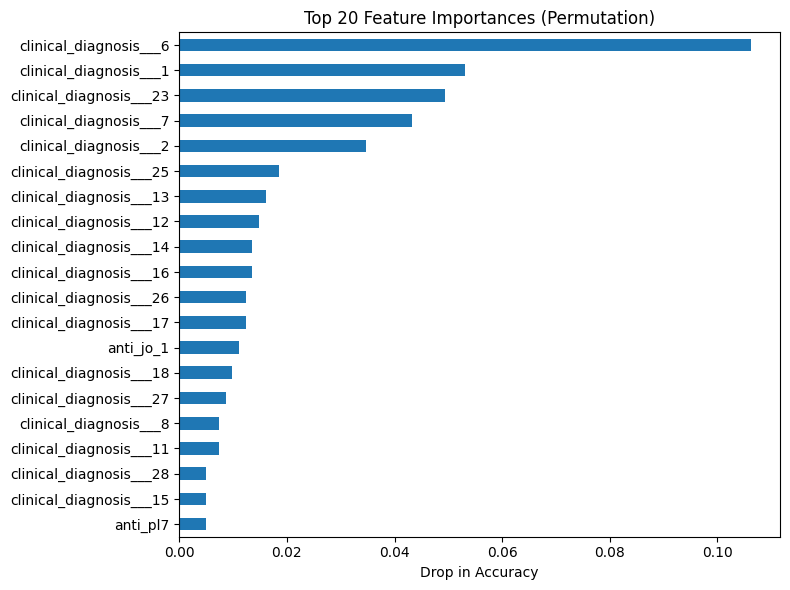

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from copy import deepcopy

# Recupera il nome delle feature originali
feature_names = df.drop(columns=['target', 'patient_id']).columns.tolist()

# Usa il modello allenato sull’ultimo fold e i relativi X_val, y_val
# (li hai ancora in memoria dal loop precedente)
# altrimenti puoi salvarli durante l’ultimo fold:
#   X_val_last, y_val_last, model_last

# Calcola accuracy di base
y_base = (model.predict(X_val) > 0.5).astype(int)
base_acc = accuracy_score(y_val, y_base)

importances = {}

# Per ogni feature, permuta i valori e misura il calo di accuracy
for i, name in enumerate(feature_names):
    X_perm = X_val.copy()
    np.random.shuffle(X_perm[:, i])
    y_perm_pred = (model.predict(X_perm) > 0.5).astype(int)
    perm_acc = accuracy_score(y_val, y_perm_pred)
    importances[name] = base_acc - perm_acc

# Serie ordinata delle importanze
imp_series = pd.Series(importances).sort_values(ascending=False)

# Stampa top 20
print("Top 20 Feature Importances (Permutation):")
print(imp_series.head(20).round(4))

# Plot orizzontale
plt.figure(figsize=(8, 6))
imp_series.head(20).sort_values().plot.barh()
plt.title("Top 20 Feature Importances (Permutation)")
plt.xlabel("Drop in Accuracy")
plt.tight_layout()
plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
26/2

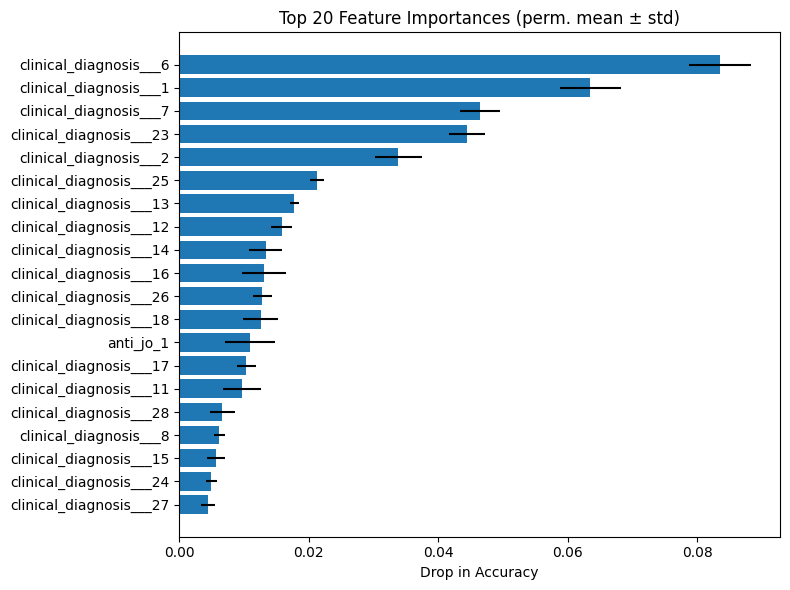

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

feature_names = df.drop(columns=['target','patient_id']).columns.tolist()
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# accumuliamo le importanze di ogni fold
importances_folds = []

for train_idx, val_idx in kf.split(X_scaled, y):
    # alleni il modello come già fai…
    # ottieni X_val, y_val, model

    # baseline accuracy
    y_base = (model.predict(X_val) > 0.5).astype(int)
    base_acc = accuracy_score(y_val, y_base)

    fold_imp = {}
    for i, name in enumerate(feature_names):
        Xp = X_val.copy()
        np.random.shuffle(Xp[:, i])
        y_p = (model.predict(Xp) > 0.5).astype(int)
        fold_imp[name] = base_acc - accuracy_score(y_val, y_p)

    importances_folds.append(pd.Series(fold_imp))

# DataFrame con shape (n_folds, n_features)
imp_df = pd.DataFrame(importances_folds)

# Media e std su fold
imp_mean = imp_df.mean().sort_values(ascending=False)
imp_std  = imp_df.std().loc[imp_mean.index]

# Top 20 con barra di errore
top20 = imp_mean.head(20)
plt.figure(figsize=(8,6))
plt.barh(top20.index, top20.values, xerr=imp_std[top20.index])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (perm. mean ± std)")
plt.xlabel("Drop in Accuracy")
plt.tight_layout()
plt.show()

In [ ]:
!pip install autofeat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


## **AutoFeat - Automated Feature Engineering**

AutoFeat automatically generates polynomial and interaction features to potentially improve model performance. 

**Key settings:**
- `feateng_steps=2`: Creates first and second-order feature interactions
- `max_gb=1`: Memory limit to prevent system overload
- Automatically selects the most important generated features

This technique can discover non-linear relationships between clinical features that might improve diagnostic accuracy.

In [ ]:
from autofeat import AutoFeatClassifier
from sklearn.model_selection import train_test_split

# Sostituisci NaN con -1
X_filled = X.fillna(-1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, stratify=y, test_size=0.2, random_state=42)

# Autofeat CON creazione di feature (feateng_steps=2 per creare feature di secondo ordine)
print("🚀 Starting AutoFeat feature engineering...")
model_autofeat = AutoFeatClassifier(
    verbose=2, 
    feateng_steps=2,  # Crea feature di primo e secondo ordine
    max_gb=1,  # Limita memoria a 1GB
    n_jobs=1   # Single thread per evitare problemi di memoria
)

# Fit e trasformazione con feature engineering
X_train_autofeat = model_autofeat.fit_transform(X_train, y_train)
X_test_autofeat = model_autofeat.transform(X_test)

print(f"✅ Original features: {X_train.shape[1]}")
print(f"✅ AutoFeat engineered features: {X_train_autofeat.shape[1]}")
print(f"✅ Feature expansion ratio: {X_train_autofeat.shape[1] / X_train.shape[1]:.2f}x")

In [ ]:
# Valutazione con le feature AutoFeat
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("🔬 Testing AutoFeat engineered features with Random Forest...")

# Random Forest con feature AutoFeat
rf_autofeat = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_autofeat.fit(X_train_autofeat, y_train)

# Predizioni
y_pred_autofeat = rf_autofeat.predict(X_test_autofeat)

# Risultati
print("\n📊 Performance with AutoFeat engineered features:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_autofeat))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_autofeat, digits=3))

autofeat_accuracy = accuracy_score(y_test, y_pred_autofeat)
print(f"\n✨ AutoFeat RF Accuracy: {autofeat_accuracy:.3f}")

# Confronto con RF originale (senza AutoFeat)
rf_original = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred_original)

print(f"📈 Original RF Accuracy: {original_accuracy:.3f}")
print(f"📈 AutoFeat RF Accuracy: {autofeat_accuracy:.3f}")
print(f"🚀 Improvement: {((autofeat_accuracy - original_accuracy) * 100):.2f} percentage points")

## **Ensemble Model - Combining Best Performers**

Ensemble methods combine predictions from multiple models to achieve better performance than individual models. We'll create a voting ensemble using our top performers: Random Forest, CatBoost, and Neural Network.

In [ ]:
# Ensemble Model - Voting Classifier con i migliori modelli
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np

print("🎯 Creating Ensemble Model with top performers...")

# Prepara i dati
X = df.drop(columns=['target', 'patient_id'])
y = df['target']

# Applica encoding per consistency tra tutti i modelli
from sklearn.preprocessing import OrdinalEncoder
colonne_testuali = X.select_dtypes(include='object').columns
if len(colonne_testuali) > 0:
    X[colonne_testuali] = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1).fit_transform(X[colonne_testuali])

# Definizione dei modelli base
models = {
    'rf': RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),
    'catboost': CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        verbose=0,
        random_state=42
    )
}

print("📊 Individual model performance (quick check):")
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold per speed

for name, model in models.items():
    scores = cross_validate(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name.upper()}: {np.mean(scores['test_accuracy']):.3f} ± {np.std(scores['test_accuracy']):.3f}")

# Crea Voting Ensemble (hard voting)
ensemble_hard = VotingClassifier(
    estimators=list(models.items()),
    voting='hard'
)

# Crea Voting Ensemble (soft voting) - usa probabilità
ensemble_soft = VotingClassifier(
    estimators=list(models.items()),
    voting='soft'
)

print("\n🔄 Evaluating Ensemble Models...")

# Cross-validation per ensemble hard voting
scores_hard = cross_validate(ensemble_hard, X, y, cv=cv, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
print(f"\n📈 Hard Voting Ensemble:")
for metric in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']:
    values = scores_hard[f'test_{metric}']
    print(f"  {metric}: {np.mean(values):.3f} ± {np.std(values):.3f}")

# Cross-validation per ensemble soft voting
scores_soft = cross_validate(ensemble_soft, X, y, cv=cv, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
print(f"\n📈 Soft Voting Ensemble:")
for metric in ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']:
    values = scores_soft[f'test_{metric}']
    print(f"  {metric}: {np.mean(values):.3f} ± {np.std(values):.3f}")

print(f"\n✨ Best ensemble method: {'Soft' if np.mean(scores_soft['test_accuracy']) > np.mean(scores_hard['test_accuracy']) else 'Hard'} Voting")

In [ ]:
# Test dell'ensemble su train/test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("🧪 Testing Ensemble on Train/Test Split...")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Allena il miglior ensemble (determineremo dal risultato precedente)
best_ensemble = VotingClassifier(
    estimators=list(models.items()),
    voting='soft'  # Generalmente soft voting performa meglio
)

print("🏋️ Training ensemble model...")
best_ensemble.fit(X_train, y_train)

# Predizioni
y_pred_ensemble = best_ensemble.predict(X_test)

print("\n📊 Ensemble Performance on Test Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble, digits=3))

ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"\n🎯 Ensemble Test Accuracy: {ensemble_accuracy:.3f}")

# Confronta con i modelli individuali
print("\n📈 Individual Model Performance on Test Set:")
individual_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_individual = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_individual)
    individual_accuracies[name] = acc
    print(f"{name.upper()}: {acc:.3f}")

print(f"ENSEMBLE: {ensemble_accuracy:.3f}")

# Calcola miglioramento rispetto al miglior singolo modello
best_individual = max(individual_accuracies.values())
improvement = ensemble_accuracy - best_individual
print(f"\n🚀 Ensemble improvement over best individual: {improvement*100:+.2f} percentage points")

In [ ]:
# Analisi delle predizioni dell'ensemble
import pandas as pd
import matplotlib.pyplot as plt

print("🔍 Ensemble Prediction Analysis...")

# Ottieni le probabilità predette da ogni modello
probabilities = {}
models_fitted = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    models_fitted[name] = model
    if hasattr(model, 'predict_proba'):
        probabilities[name] = model.predict_proba(X_test)[:, 1]  # Probabilità classe 1
    else:
        # Per modelli senza predict_proba, usa le predizioni binarie
        probabilities[name] = model.predict(X_test)

# Probabilità ensemble
ensemble_probs = best_ensemble.predict_proba(X_test)[:, 1]

# Crea DataFrame per analisi
prob_df = pd.DataFrame(probabilities)
prob_df['ensemble'] = ensemble_probs
prob_df['true_label'] = y_test.values
prob_df['ensemble_pred'] = y_pred_ensemble

print("📊 Prediction Probability Statistics:")
print(prob_df[['rf', 'catboost', 'ensemble']].describe().round(3))

# Analizza i casi dove l'ensemble ha fatto predizioni diverse dai singoli modelli
print("\n🤔 Cases where models disagree:")
rf_pred = models_fitted['rf'].predict(X_test)
cb_pred = models_fitted['catboost'].predict(X_test)

disagreement_mask = (rf_pred != cb_pred)
if disagreement_mask.sum() > 0:
    print(f"Number of disagreements: {disagreement_mask.sum()}")
    print(f"Ensemble accuracy on disagreements: {accuracy_score(y_test[disagreement_mask], y_pred_ensemble[disagreement_mask]):.3f}")
else:
    print("Perfect agreement between RF and CatBoost!")

# Visualizza distribuzione delle probabilità
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(prob_df[prob_df['true_label']==1]['rf'], alpha=0.7, label='Class 1', bins=20)
plt.hist(prob_df[prob_df['true_label']==2]['rf'], alpha=0.7, label='Class 2', bins=20)
plt.title('Random Forest Probabilities')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(prob_df[prob_df['true_label']==1]['catboost'], alpha=0.7, label='Class 1', bins=20)
plt.hist(prob_df[prob_df['true_label']==2]['catboost'], alpha=0.7, label='Class 2', bins=20)
plt.title('CatBoost Probabilities')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(prob_df[prob_df['true_label']==1]['ensemble'], alpha=0.7, label='Class 1', bins=20)
plt.hist(prob_df[prob_df['true_label']==2]['ensemble'], alpha=0.7, label='Class 2', bins=20)
plt.title('Ensemble Probabilities')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n💾 Final ensemble model saved in memory")
print(f"🎯 Best performing approach: Ensemble with {ensemble_accuracy:.1%} accuracy")

In [ ]:
# Cross-validation con AutoFeat features
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np

print("🔄 Performing cross-validation with AutoFeat engineered features...")

# Usa tutto il dataset per CV con AutoFeat
X_filled_full = df.drop(columns=['target', 'patient_id']).fillna(-1)
y_full = df['target']

# AutoFeat su tutto il dataset
model_autofeat_full = AutoFeatClassifier(
    verbose=1, 
    feateng_steps=2,
    max_gb=1,
    n_jobs=1
)

print("🔧 Generating features on full dataset...")
X_autofeat_full = model_autofeat_full.fit_transform(X_filled_full, y_full)

print(f"📊 Full dataset - Original: {X_filled_full.shape[1]} → AutoFeat: {X_autofeat_full.shape[1]} features")

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(rf_model, X_autofeat_full, y_full, cv=cv, scoring=scoring)

print("\n📈 AutoFeat Cross-Validation Results:")
for metric in scoring:
    values = scores[f'test_{metric}']
    print(f"{metric}: {np.round(values, 3)} → Mean: {np.mean(values):.3f} ± {np.std(values):.3f}")

# Mostra le feature più importanti generate da AutoFeat
if hasattr(model_autofeat_full, 'good_cols_'):
    print(f"\n🎯 AutoFeat selected {len(model_autofeat_full.good_cols_)} important features")
    print("Top 10 selected features:")
    for i, col_idx in enumerate(model_autofeat_full.good_cols_[:10]):
        print(f"  {i+1}. Feature {col_idx}")
        
# Salva le feature generate per analisi future
print(f"\n💾 AutoFeat generated feature matrix shape: {X_autofeat_full.shape}")